In [1]:
import os
from importlib import reload
import warnings
import numpy as np
import xarray as xr
import xgcm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook
import hvplot.xarray
import cmocean

import pycoawst.tools.grid as pcg 
import pycoawst.tools.circulation as pcc
import pycoawst.tools.momentum as pcm
#from pycoawst.tools.grid import metrics, dads, dadn
#from pycoawst.tools.circulation import streamwise_normal, cart2swnm, dads
#from pycoawst.tools.momentum import momn2swnm 
reload(pcg)
reload(pcc)

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
matplotlib.rcParams['text.usetex'] = False
home = os.environ["HOME"]

In [3]:
from dask.distributed import Client
Client()

<Client: 'tcp://127.0.0.1:59419' processes=4 threads=12, memory=34.36 GB>

In [2]:
results =  home + "/COAWST/Projects/slope_2D/Results/" 
avgnames = sorted([results+f for f in os.listdir(results) if f.startswith("ocean_avg")])#[-1]
dianames = sorted([results+f for f in os.listdir(results) if f.startswith("ocean_dia")])#[-1]
#hisnames = sorted([results+f for f in os.listdir(results) if f.startswith("ocean_his")])[-1]

coords={'xi':{'center':'xi_rho', 'inner':'xi_u'}, 
        'eta':{'center':'eta_rho', 'inner':'eta_v'}}

def preprocess(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})   
    ds = ds.set_coords(("x_psi","y_psi"))
    return ds

#ds = xr.open_dataset(fnames, decode_times = False)
kwargs = {"combine": "by_coords", "data_vars": "minimal", "coords": "minimal", "compat": "override",  "preprocess": preprocess, "parallel": True}
ds = xr.open_mfdataset(avgnames, decode_times = False, **kwargs)#.coarsen(ocean_time = 50, boundary = "trim", keep_attrs = True).mean()
dm = xr.open_mfdataset(dianames, decode_times = False, **kwargs)#.coarsen(ocean_time = 50, boundary = "trim", keep_attrs = True).mean()
#ds = xr.open_mfdataset(hisnames, decode_times = False, **kwargs)#.coarsen(ocean_time = 5, boundary = "trim").mean()

ds["angle"].values = np.angle(ds.x_rho + ds.y_rho*1j)

grid = xgcm.Grid(ds, coords=coords, periodic = 'xi')
metric = pcg.metrics(ds, grid = grid, vertical = False)
grid = xgcm.Grid(ds, coords=coords, metrics = metric, periodic = 'xi')

pcm.streamwise_normal(ds, grid = grid, vertical = False)

dsw, dnm = pcm.momn2swnm(dm, grid = grid)
dv = ds.copy() #for vorticity
dm

<xarray.Dataset>
Dimensions:      (eta_rho: 128, eta_v: 127, ocean_time: 1800, xi_rho: 382, xi_u: 381)
Coordinates:
    y_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(128, 382), meta=np.ndarray>
    y_u          (eta_rho, xi_u) float64 dask.array<chunksize=(128, 381), meta=np.ndarray>
    y_v          (eta_v, xi_rho) float64 dask.array<chunksize=(127, 382), meta=np.ndarray>
    x_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(128, 382), meta=np.ndarray>
    x_v          (eta_v, xi_rho) float64 dask.array<chunksize=(127, 382), meta=np.ndarray>
    x_psi        (eta_v, xi_u) float64 dask.array<chunksize=(127, 381), meta=np.ndarray>
    x_u          (eta_rho, xi_u) float64 dask.array<chunksize=(128, 381), meta=np.ndarray>
    y_psi        (eta_v, xi_u) float64 dask.array<chunksize=(127, 381), meta=np.ndarray>
  * ocean_time   (ocean_time) float64 300.0 900.0 1.5e+03 ... 1.079e+06 1.08e+06
Dimensions without coordinates: eta_rho, eta_v, xi_rho, xi_u
Data variables:
    rho0         float64 ...
    f            (eta_rho, xi_rho) float64 dask.array<chunksize=(128, 382), meta=np.ndarray>
    Znudg        float64 ...
    ntsAVG       int32 ...
    rdrg         float64 ...
    dt           float64 ...
    Lm2CLM       int32 ...
    nDIA         int32 ...
    gamma2       float64 ...
    LwSrc        int32 ...
    LnudgeM2CLM  int32 ...
    dtfast       float64 ...
    pm           (eta_rho, xi_rho) float64 dask.array<chunksize=(128, 382), meta=np.ndarray>
    ndtfast      int32 ...
    nRST         int32 ...
    rdrg2        float64 ...
    ndefDIA      int32 ...
    nAVG         int32 ...
    ndefHIS      int32 ...
    angle        (eta_rho, xi_rho) float64 dask.array<chunksize=(128, 382), meta=np.ndarray>
    pn           (eta_rho, xi_rho) float64 dask.array<chunksize=(128, 382), meta=np.ndarray>
    dstart       float64 ...
    ndefAVG      int32 ...
    el           float64 ...
    spherical    int32 ...
    LuvSponge    int32 ...
    M2nudg       float64 ...
    LsshCLM      int32 ...
    ntsDIA       int32 ...
    ntimes       int32 ...
    xl           float64 ...
    nHIS         int32 ...
    nl_visc2     float64 ...
    LuvSrc       int32 ...
    h            (eta_rho, xi_rho) float64 dask.array<chunksize=(128, 382), meta=np.ndarray>
    ubar_cor     (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_cor     (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta=np.ndarray>
    ubar_hadv    (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_hadv    (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta=np.ndarray>
    ubar_xadv    (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_xadv    (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta=np.ndarray>
    ubar_yadv    (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_yadv    (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta=np.ndarray>
    ubar_hvisc   (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_hvisc   (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta=np.ndarray>
    ubar_prsgrd  (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_prsgrd  (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta=np.ndarray>
    ubar_bstr    (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_bstr    (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta=np.ndarray>
    ubar_accel   (ocean_time, eta_rho, xi_u) float32 dask.array<chunksize=(12, 128, 381), meta=np.ndarray>
    vbar_accel   (ocean_time, eta_v, xi_rho) float32 dask.array<chunksize=(12, 127, 382), meta

In [5]:
#Momentum
ylim = (0, 3000)
xlim = (-2500, 2500)
norm = colors.TwoSlopeNorm(vcenter = 0, vmin = -1e-5, vmax = 1e-5)
kwargs = {"cmap": "RdBu_r","xlim": xlim, "ylim": ylim, "add_colorbar": False, "norm": norm}
fig, axes  = plt.subplots(2, 3, sharex = True, sharey = True)

components = [f for f in [*dsw.variables] if f in ["accel_bar", "bstr_bar", "cor_bar", "hadv_bar", "hvisc_bar", "prsgrd_bar"]]
for k,var in enumerate(components):
    ax = axes.flatten()[k]
    dnm[var].isel(ocean_time = -1).plot(ax = ax, x = "x_psi", y = "y_psi", **kwargs)
    ax.set_title(var), ax.set_xlabel(None), ax.set_ylabel(None)
    ax.set_aspect("equal")
    
fig.subplots_adjust(hspace = 0.1)

In [6]:
#Bell and Keyser 1992 appendix way to calculate shear and curvature vorticity
cff = ds.pm_psi*ds.pn_psi #area at psi points

V, u, v =  ds.Usbar.isel(ocean_time = -1), ds.ubar_psi.isel(ocean_time = -1), ds.vbar_psi.isel(ocean_time = -1)

dudx = grid.interp(grid.diff(ds.ubar*ds.pm_u, "xi"), ["xi","eta"])
dvdy = grid.interp(grid.diff(ds.vbar*ds.pn_v, "eta", boundary = "fill"), ["xi","eta"])
dudy = grid.diff(ds.ubar*ds.pn_u, "eta") 
dvdx = grid.diff(ds.vbar*ds.pm_v, "xi")

ds["K"] = pcc.dads(ds.Usbar, ds.ubar_psi, ds.vbar_psi, dudx, dudy, dvdx, dvdy)
dv["shear"] = pcc.dudn(ds.Usbar, ds.ubar_psi, ds.vbar_psi, dudx, dudy, dvdx, dvdy)
dv["orbital"] = ds.Usbar*ds.K
ds["R"] = 1/ds.K
ds["dadn"] = pcc.dadn(ds.Usbar, ds.ubar_psi, ds.vbar_psi, dudx, dudy, dvdx, dvdy)
ds["duds"] = pcc.duds(ds.Usbar, ds.ubar_psi, ds.vbar_psi, dudx, dudy, dvdx, dvdy)

dv["rvorticity_bar"] = dv.shear + dv.orbital
resid = dv.rvorticity_bar - ds.rvorticity_bar

ds["dkds"] = pcc.dqds(  grid.interp(grid.diff(ds.K*ds.pm_psi, "xi"), "xi", boundary = "fill") ,  grid.interp(grid.diff(ds.K*ds.pn_psi, "eta",  boundary = "fill"), "eta"), V, u, v)
ds["dhdn"] = pcc.dqdn( grid.interp(grid.diff(ds.h*ds.pm, "xi"), "eta"),  grid.interp(grid.diff(ds.h*ds.pn, "eta"), "xi"), V, u, v)
ds["dhds"] = pcc.dqds( grid.interp(grid.diff(ds.h*ds.pm, "xi"), "eta"),  grid.interp(grid.diff(ds.h*ds.pn, "eta"), "xi"), V, u, v)

In [12]:
#Volume budget
ds["zeta_psi"] = grid.interp(grid.interp(ds.zeta, "xi"), "eta")
ds["zeta_u"] = grid.interp(ds.zeta, "xi")
ds["zeta_v"] = grid.interp(ds.zeta, "eta")

ds["qu"] = ds.ubar*(ds.h_u + ds.zeta_u)#*ds.pn_u
ds["qv"] = ds.vbar*(ds.h_v + ds.zeta_v)#*ds.pm_v
ds["qs"] = np.hypot( grid.interp(ds.qu, "eta", boundary = "fill"),  grid.interp(ds.qv, "xi"))

ds["dqds"] = pcc.dqds( grid.interp( grid.interp( grid.diff(ds.qu*ds.pm_u, "xi"), "xi"), "eta"), 
                       grid.interp( grid.interp( grid.diff(ds.qv*ds.pn_v,"eta", boundary = "fill"), "xi"), "eta"),
                       V , u, v)
ds["qrotary"] = ds.Usbar*ds.h_psi*ds.dadn
ds["continuity"] = ds.dqds + ds.qrotary

ds["detads"] = pcc.dqds( grid.interp(grid.diff(ds.zeta*ds.pm, "xi"), "eta"),  grid.interp(grid.diff(ds.zeta*ds.pn, "eta"), "xi"), V, u, v)
#ds["divs"] = ds.dqds/ds.qs

In [96]:
#Vorticity budget along path

from scipy.interpolate import RegularGridInterpolator as rgi
ds["r_psi"] = np.hypot(ds.x_psi, ds.y_psi)
ds['angle_psi'] = grid.interp( grid.interp(ds.angle, 'xi'), 'eta')

ds["psi"] = grid.cumsum(ds.vbar * ds.pm_v, 'xi', boundary='fill')
paths = dv.shear.isel(ocean_time = -1).plot.contour(x = "x_psi", y = "y_psi", levels = [0]).collections[0].get_paths()#[0].vertices[::-1][2:]
pdiff = [p.vertices[0,:] for p in paths] - np.array([12e3,0]) #minimal distance from jet inflow
pind = np.argmin( np.hypot(pdiff[:,0], pdiff[:,1]) )
path = paths[pind].vertices[3::]

rdiff = np.linalg.norm( [p.vertices[0,:] for p in paths], axis = 1 ) - np.linalg.norm( path[-1,:] ) #closest radial point of first path, i.e. periodic condition
pind = np.argmin( abs(rdiff) )
path2 = paths[pind].vertices

# path = np.vstack((path,path2))
xp,yp = path[:,0], path[:,1]
xp2,yp2 = path2[:,0], path2[:,1]
s = np.cumsum(np.hypot(np.gradient(xp), np.gradient(yp)))
s2 = np.append(s, s[-1] + np.cumsum(np.hypot(np.gradient(xp2), np.gradient(yp2))) )
rp,tp = np.hypot(xp,yp), np.arctan2(yp,xp)
rp2,tp2 = np.hypot(xp2,yp2), np.arctan2(yp2,xp2)

path = np.vstack((tp,rp)).T
path2 = np.vstack((tp2,rp2)).T


plt.plot(xp,yp, "r")
plt.plot(xp2,yp2, "r")
plt.gca().set_aspect("equal")
plt.close()

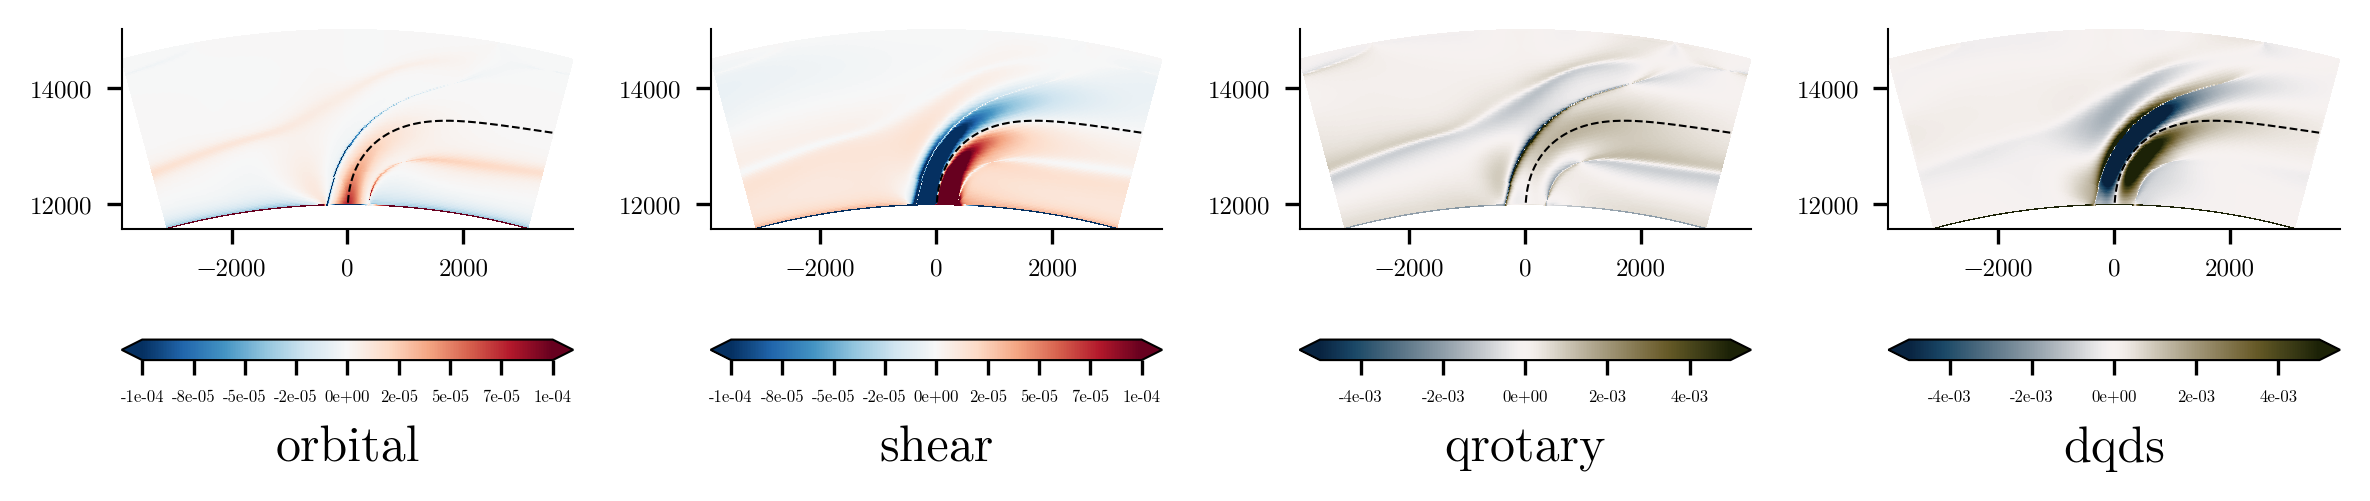

In [92]:
#Plotting

xlim, ylim = (None, None), (None, None)
norm = colors.TwoSlopeNorm(vcenter = 0, vmin = -1e-4, vmax = 1e-4)
kwargs = {"cmap": "RdBu_r","xlim": xlim, "ylim": ylim, "norm": norm, "add_colorbar": True}
cbar_kwargs = {"orientation": "horizontal", "pad": .10, "format": '%.0e'}

fig,axes = plt.subplots(1,4,figsize = (8,4), squeeze = False)
dv.orbital.isel(ocean_time=-1).plot.pcolormesh(x = "y_psi", y = "x_psi", ax = axes[0,0], cbar_kwargs = cbar_kwargs, **kwargs)
dv.shear.isel(ocean_time=-1).plot.pcolormesh(x = "y_psi", y = "x_psi", ax = axes[0,1], cbar_kwargs = cbar_kwargs,  **kwargs)
kwargs.pop("norm"), kwargs.pop("cmap")
ds.qrotary.isel(ocean_time = - 1).plot.pcolormesh(x = "y_psi", y = "x_psi", ax = axes[0,2], vmin = -5e-3, vmax=5e-3, cmap = cmocean.cm.diff, cbar_kwargs = cbar_kwargs,  **kwargs)
ds.dqds.isel(ocean_time = - 1).plot.pcolormesh(x = "y_psi", y = "x_psi", ax = axes[0,3], vmin = -5e-3, vmax = 5e-3, cmap = cmocean.cm.diff, cbar_kwargs = cbar_kwargs, **kwargs)

#ds.rvorticity_bar.isel(ocean_time=-1).plot.pcolormesh(x = "x_psi", y = "y_psi", ax = axes[0,1], vmin = -1e-4, vmax = 1e-4, cbar_kwargs = cbar_kwargs, **kwargs)
#ds.Qs.isel(ocean_time=-1).plot.pcolormesh(x = "x_psi", y = "y_psi", ax = axes[0,1], vmin = 0, vmax = 5, cmap = cmocean.cm.gray_r, **kwargs)
#ds.psi.isel(ocean_time=-1).plot.pcolormesh(x = "x_psi", y = "y_psi", ax = axes[0,1], vmin = None, vmax =None, cmap = cmocean.cm.tarn, **kwargs)
# ds.dadn.isel(ocean_time=-1).plot.pcolormesh(x = "x_psi", y = "y_psi", ax = axes[0,1], vmin = -np.pi/1000, vmax = np.pi/1000, cmap = "twilight_shifted", **kwargs)
# ds.duds.isel(ocean_time=-1).plot.pcolormesh(x = "x_psi", y = "y_psi", ax = axes[0,1], vmin = -1e-3, vmax = 1e-3, cmap = cmocean.cm.balance, **kwargs)
# ds.dhds.plot.pcolormesh(x = "x_psi", y = "y_psi", ax = axes[0,1],  cmap = cmocean.cm.balance, **kwargs)

for ax in axes.flatten():
    ax.plot(yp,xp,"k--", linewidth = .5)
    #ax.plot(yp2,xp2,"k--", linewidth = .5)
    ax.collections[-1].colorbar.ax.tick_params(labelsize = 4)
    ax.tick_params(labelsize = 6)
    ax.set_title(None)
    ax.set_xlabel("x (m)", fontsize = 8), ax.set_ylabel("y (m)", fontsize = 8)
    ax.set_aspect("equal")
    if ax.is_last_col():
        ax.set_ylabel(None)
    if not ax.is_last_row():
        ax.set_xlabel(None)

#fig.subplots_adjust(hspace = -.5, wspace = .25)
fig.tight_layout()
#assert (ds.strain.shape == ds.vbar_psi.shape),  f"strain dimension {ds.strain.shape} must match \Psi coords {ds.ubar_psi.shape}"

In [34]:
#Vorticity diagnostics

#dm["vrt_xadv"] =  (grid.diff(dm.vbar_xadv, "xi") - grid.diff(dm.ubar_xadv, "eta"))*cff
#dm["vrt_yadv"] =  (grid.diff(dm.vbar_yadv, "xi") - grid.diff(dm.ubar_yadv, "eta"))*cff
dm["vrt_rate"] =  (grid.diff(dm.vbar_accel, "xi") - grid.diff(dm.ubar_accel, "eta"))*cff
dm["vrt_hadv"] =  (grid.diff(dm.vbar_hadv, "xi") - grid.diff(dm.ubar_hadv, "eta"))*cff
dm["vrt_hvisc"] =  (grid.diff(dm.vbar_hvisc, "xi") - grid.diff(dm.ubar_hvisc, "eta"))*cff
dm["vrt_cor"] =  (grid.diff(dm.vbar_cor, "xi") - grid.diff(dm.ubar_cor, "eta"))*cff
dm["vrt_prsgrd"] =  (grid.diff(dm.vbar_prsgrd, "xi") - grid.diff(dm.ubar_prsgrd, "eta"))*cff
dm["vrt_drag"] =  (grid.diff(dm.vbar_bstr, "xi") - grid.diff(dm.ubar_bstr, "eta"))*cff

#dm["vrt_slope"] = -ds.Usbar**2*(ds.rdrg2/ds.h_psi**2)*0.1*np.cos(ds.alphabar)*cff #-ds.Usbar*(ds.rdrg2/ds.h_psi**2)*( ds.vbar_psi*grid.interp(ds.dhdxi, "eta")*ds.pn_psi - ds.ubar_psi*grid.interp(ds.dhdeta, "xi")*ds.pm_psi )
#dm["vrt_speed"] = -(ds.rdrg2/ds.h_psi)*(ds.vbar_psi*ds.Usbar.differentiate("xi_u")- ds.ubar_psi*ds.Usbar.differentiate("eta_v"))*cff
#dm["vrt_dissip"] = +ds.Usbar*(ds.rdrg2/ds.h_psi)*ds.rvorticity*cff
#dm["drag_compute"] = dm.vrt_slope + dm.vrt_speed + dm.vrt_dissip
#dm["drag_compute"] = (ds.rdrg2/ds.h_psi)*ds.Usbar**2
#dm["drag_resid"] = #dm.vrt_drag - dm.drag_compute
#dm["vrt_total"] =  dm.vrt_hadv + dm.vrt_hvisc + dm.vrt_cor + dm.vrt_drag + dm.vrt_prsgrd - dm.vrt_rate

In [97]:
def field2path(var,path):
    #F = rgi( (ds.x_psi[0,:].values, ds.y_psi[:,0].values), var)
    F = rgi( (ds.angle_psi.values[0,:][::-1],ds.r_psi.values[:,0]), np.flip(var[::].T, axis = 0), bounds_error = False, fill_value  = np.nan)
    return F(path)

#path = np.vstack((path,path2))

f = ds.f.mean().values
up = field2path(ds.Usbar.isel(ocean_time = -1).values, path)
hp = field2path(ds.h_psi.values, path)
dp = field2path(ds.zeta_psi.isel(ocean_time = -1).values + ds.h_psi.values, path)
dqdsp = field2path(ds.dqds.isel(ocean_time = -1).values, path)
dhdsp = field2path(ds.dhds.values, path)
dhdnp = field2path(ds.dhdn.values, path)
kip = field2path(1/ds.r_psi.values, path)
ksp = field2path(ds.K.isel(ocean_time = -1).values, path)
dadnp = field2path(ds.dadn.isel(ocean_time = -1).values, path)
dudsp = field2path(ds.duds.isel(ocean_time = -1).values, path)
sp = field2path(dv.shear.isel(ocean_time = -1).values, path)
op = field2path(dv.orbital.isel(ocean_time = -1).values, path)
dkdsp = field2path(ds.dkds.isel(ocean_time = -1).values, path)

# hadv = field2path(dm.vrt_hadv.isel(ocean_time=-1).values, path)
# drag = field2path(dm.vrt_drag.isel(ocean_time=-1).values, path)
# cor = field2path(dm.vrt_cor.isel(ocean_time=-1).values, path)

def nonlinear(h,dhds,k,f,u):
    return (1/h)*dhds*(2*k + f/u)

def spreading(k,dadn):
    return k*dadn
#    return -duds*k/u
    
def dissipation(Cd,k,h):
    return -Cd*k/h

def slope_torque(Cd,dhdn,h):
    return -Cd*dhdn/h**2

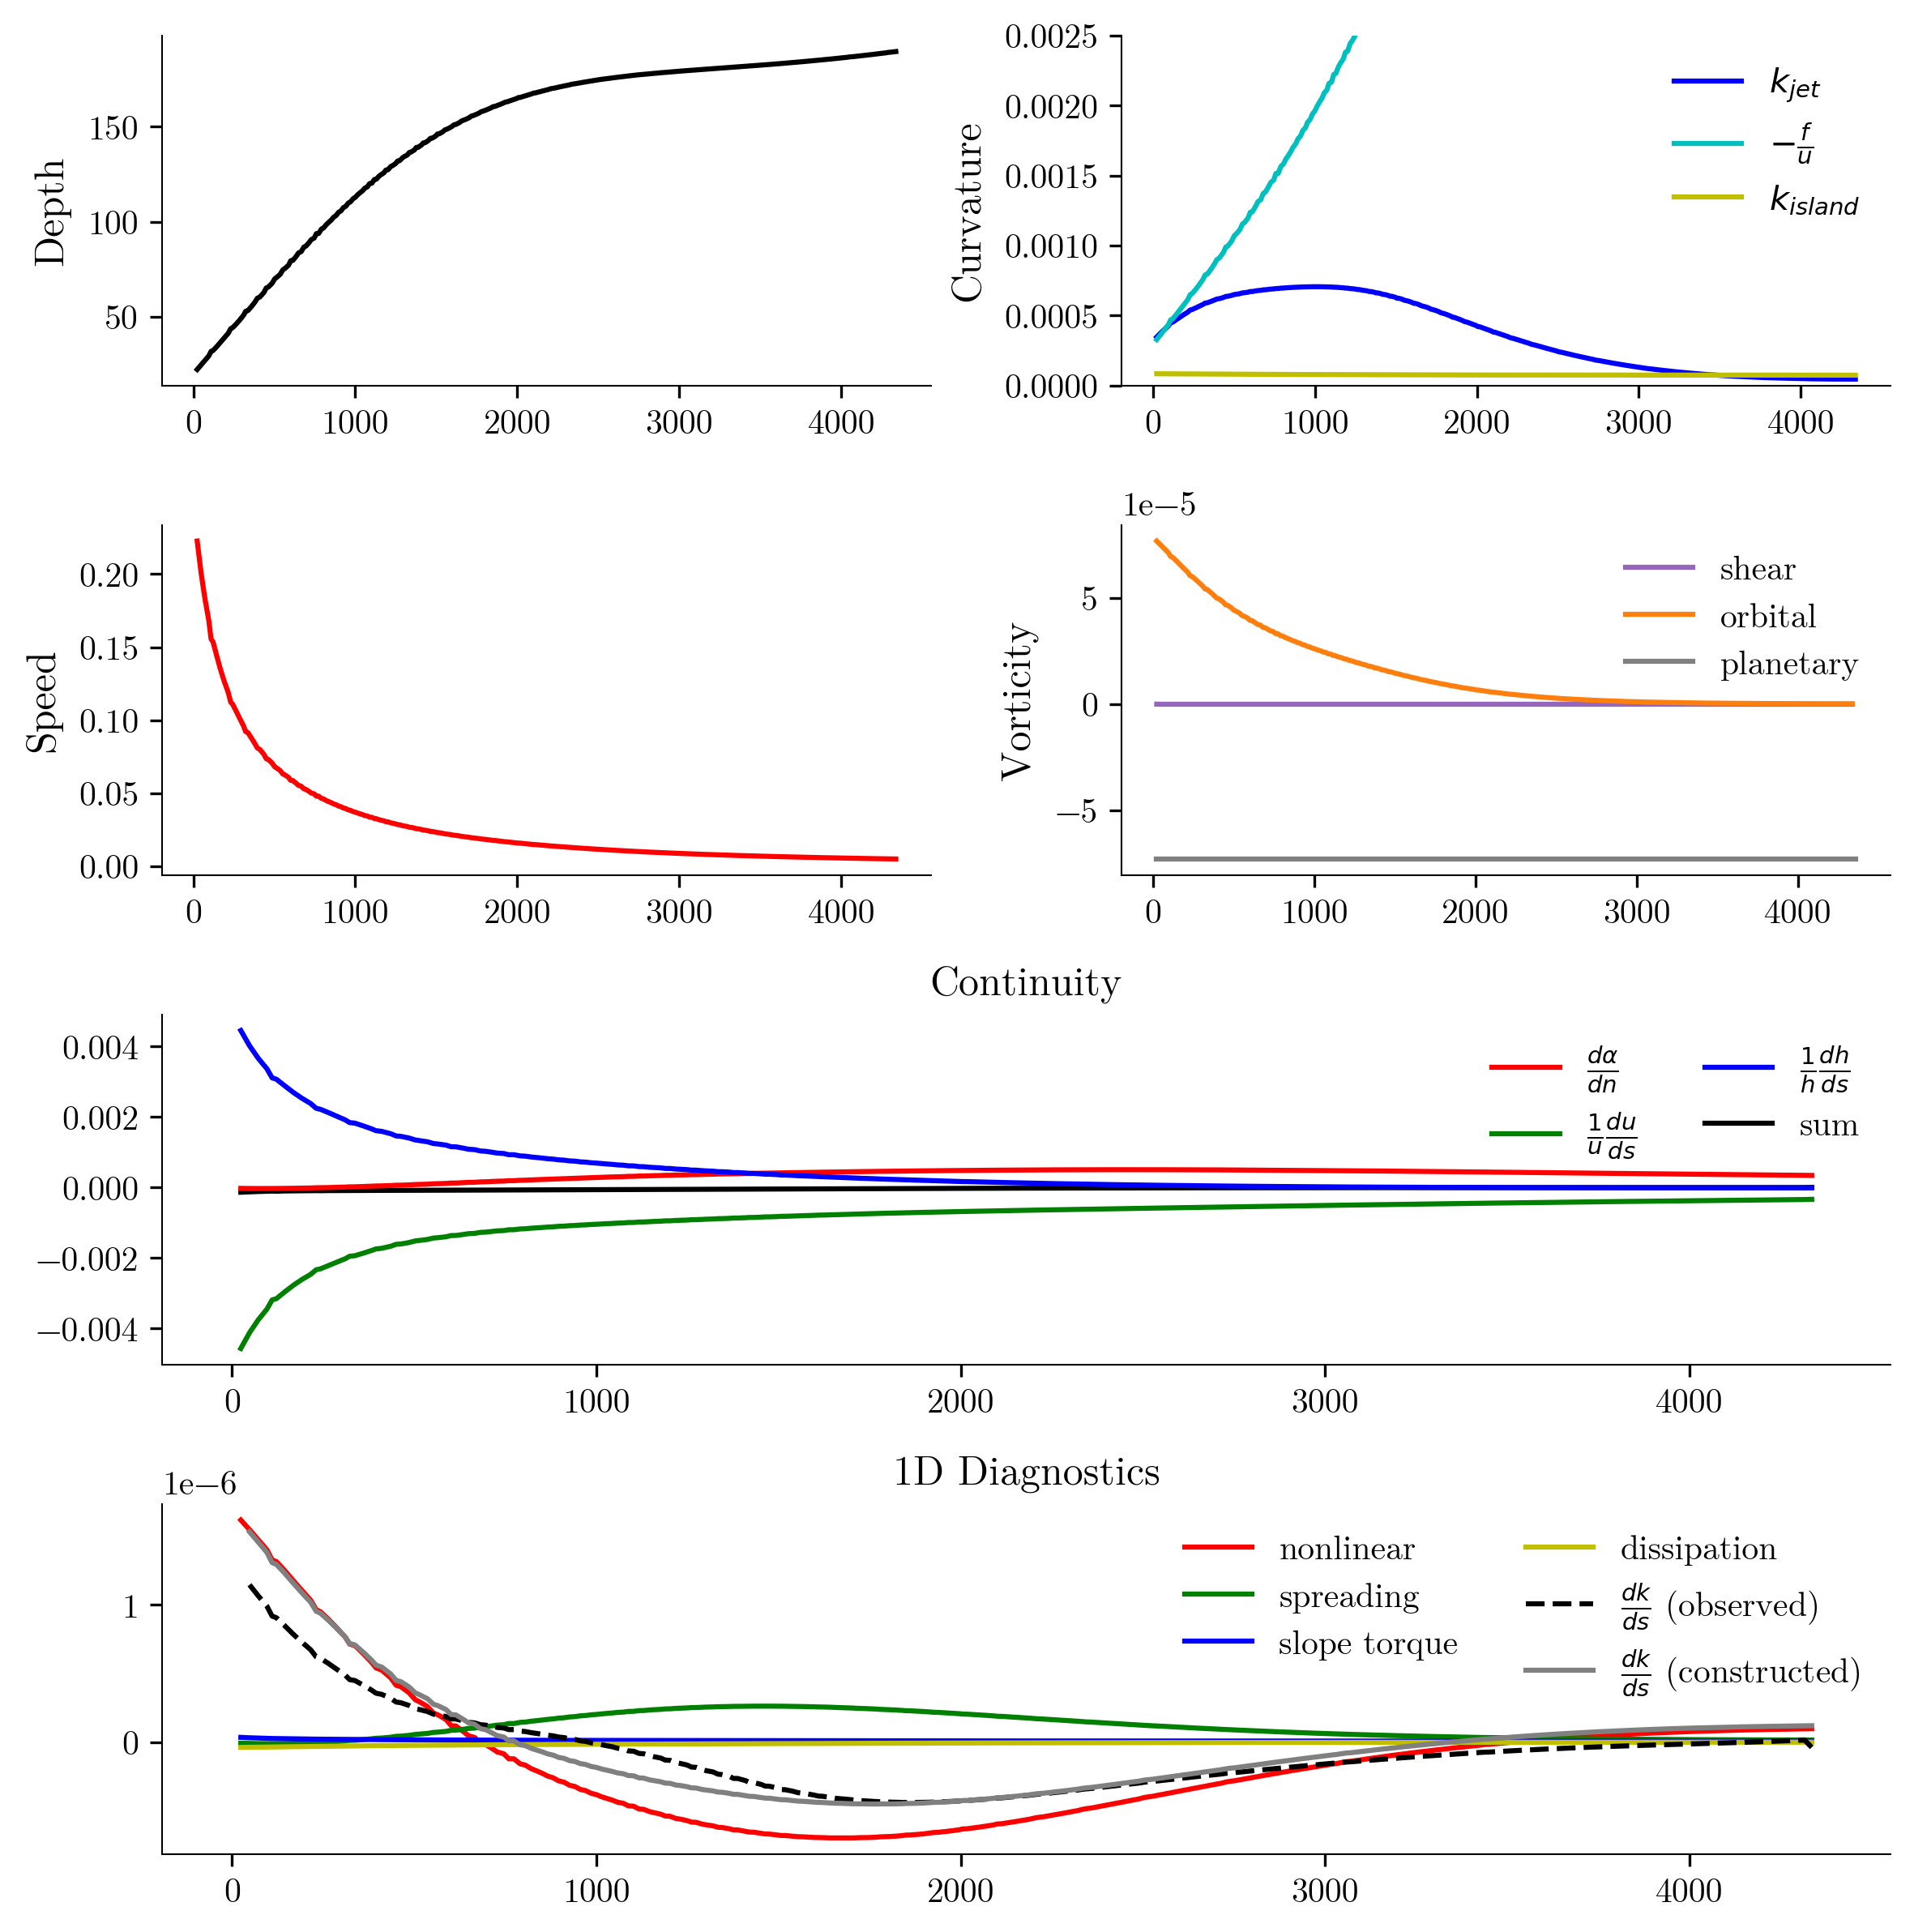

In [100]:
fig,ax = plt.subplots(4,2, figsize=(8,8))
ax[0,0].plot(s,hp,"k"), ax[0,0].set_ylabel("Depth")
ax[1,0].plot(s,up,"r"), ax[1,0].set_ylabel("Speed")
ax[0,1].plot(s,ksp,"b", label = "$k_{jet}$"), ax[0,1].set_ylabel("Curvature")
ax[0,1].plot(s,-f/up,"c", label = r"$-\frac{f}{u}$")
ax[0,1].plot(s,kip,"y", label = "$k_{island}$") #island curvature
ax[0,1].set_ylim(0, .0025)
ax[0,1].legend(loc = "upper right", frameon = False)

ax[1,1].set_ylabel("Vorticity")
ax[1,1].plot(s,sp,"tab:purple", label = "shear") #shear
ax[1,1].plot(s,op,"tab:orange", label = "orbital") #orbital
ax[1,1].plot(s, s*0 + ds.f.mean().values, color = "grey", label = "planetary") #planetary
# ax[1,1].plot(s, up*ksp/ds.f.mean().values, color = "m"), ax[4,0].set_ylabel("Ro")#rossby
ax[1,1].legend(loc = "upper right", frameon = False)

plt.subplot(4,1,3)
plt.title("Continuity")
plt.plot(s,dadnp,"r", label = r"$\frac{d\alpha}{dn}$")
plt.plot(s,dudsp/up,"g", label = r"$\frac{1}{u}\frac{du}{ds}$")
plt.plot(s,dhdsp/dp,"b", label =r"$\frac{1}{h}\frac{dh}{ds}$")
#plt.plot(s,dqdsp/qp,"g", label = r'$\frac{1}{q}\frac{dq}{ds}$')
total = dadnp + dudsp/up + dhdsp/hp
plt.plot(s,total, color = "k", label = "sum", zorder = 0)
plt.legend(loc = "upper right", frameon = False, ncol = 2)

plt.subplot(4,1,4)
# #1D Diagnostics
nlr, spr, stq, dsp = nonlinear(hp,dhdsp,ksp,f,up), spreading(ksp,dadnp), slope_torque(2.5e-3,dhdnp,hp), dissipation(2.5e-3,ksp,hp)
plt.title("1D Diagnostics")
plt.plot(s, nlr,"r", label = "nonlinear")
plt.plot(s, spr, "g", label = "spreading")
plt.plot(s, stq,"b", label = "slope torque")
plt.plot(s, dsp,"y", label = "dissipation")

total = nlr + spr + stq + dsp
plt.plot(s[1:], dkdsp[1:], "k--", label = r"$\frac{dk}{ds}$ (observed)")
plt.plot(s[1:], total[1:], c = "gray", label = r"$\frac{dk}{ds}$ (constructed)")
# plt.gca().set_ylim(-1e-7,1e-7)
plt.legend(loc = "upper right", frameon = False, ncol = 2)

#ROMS diagnostics
# plt.plot(s,hadv,"k")
# plt.plot(s,drag,"r")
# plt.plot(s,cor,"b")
# plt.legend(["advection","drag","coriolis"], frameon = False)

#ax[-1,0].set_xlabel("Path distance (m)")
fig.tight_layout()
#ds.K.isel(ocean_time=-1).interp(x_psi = 500, y_psi = 1000)

In [32]:
ylim = (0, 2000)
xlim = (-2500, 2500)
norm = colors.TwoSlopeNorm(vcenter = 0, vmin = -1e-3, vmax = 1e-3)

# kwargs = {"cmap": "RdBu_r","xlim": xlim, "ylim": ylim, "add_colorbar": False, "norm": norm}
# fig,ax=plt.subplots(2,2)
# dv.curvature.isel(ocean_time = 0).plot(ax = ax[0,0], x = "x_psi", y = "y_psi", **kwargs)
# dv.shear.isel(ocean_time = 0).plot(ax = ax[0,1], x = "x_psi", y = "y_psi", **kwargs)
# dv.rvorticity_bar.isel(ocean_time = 0).plot(ax = ax[1,0], x = "x_psi", y = "y_psi", **kwargs)
# ds.rvorticity_bar.isel(ocean_time = 0).plot(ax = ax[1,1], x = "x_psi", y = "y_psi", **kwargs)

kwargs = {"cmap": "RdBu_r","xlim": xlim, "ylim": ylim, "add_colorbar": True, "norm": norm}
cbar_kwargs = {"orientation": "horizontal", "pad": 0.3, "label": None}
fig, axes = plt.subplots(1,, figsize = (6,3))
resid.isel(ocean_time = 0).plot(ax = ax=axes[2], x = "x_psi", y = "y_psi", **kwargs)

dv["curvature"].isel(ocean_time = 0).plot(ax = axes[0], x = "x_psi", y = "y_psi", cbar_kwargs = cbar_kwargs, **kwargs)
dv["dudn"].isel(ocean_time = 0).plot(ax = axes[1], x = "x_psi", y = "y_psi", cbar_kwargs = cbar_kwargs, **kwargs)
#ds["R"].isel(ocean_time = 0).plot(ax = ax, x = "x_psi", y = "y_psi", vmin = -1e4, vmax = 1e4, cmap = "RdBu_r")

#ds["K"].isel(ocean_time = 0).plot(ax = axes[0], x = "x_psi", y = "y_psi", vmin = -1e-2, vmax = 1e-2, cmap = "RdBu_r", 
#                                   cbar_kwargs = {"orientation": "horizontal", "pad": 0.3})
cf = 3
dq = ds.coarsen(xi_u = cf, boundary = "trim").mean().coarsen(eta_v = cf, boundary = "trim").mean().isel(ocean_time = 0)
#ax.quiver(dq.x_psi, dq.y_psi, dq.ubar_psi, dq.vbar_psi, scale = 1, headwidth = 2, alpha = 0.5)

for ax in axes:
    ax.set_title(None)
    ax.set_xlabel("x (m)", fontsize = 8), ax.set_ylabel("y (m)", fontsize = 8)
    ax.set_xlim(xlim), ax.set_ylim(ylim)
    ax.set_aspect("equal")
    if ax.is_last_col():
        ax.set_ylabel(None)
    if not ax.is_last_row():
        ax.set_xlabel(None)


SyntaxError: invalid syntax (<ipython-input-32-abe4ff2a8703>, line 14)

In [125]:
# ylim = (0, 1000)
# xlim = (-1000, 1000)

norm = colors.TwoSlopeNorm(vcenter = 0, vmin = -1e-8, vmax = 1e-8)
#norm = colors.SymLogNorm(linthresh = 1e-, vmin = -1e-8, vmax = 1e-8)
kwa = {"cmap": "RdBu_r", "xlim": xlim, "ylim": ylim, "add_colorbar": False}
if kwa["add_colorbar"]:
    cbar_kwargs = {"orientation": "horizontal", "pad": .15, "label": None}
else:
    cbar_kwargs = None

#terms = ["vorticity_advection", "vortex_stretching", "slope_torque", "speed_torque", "vorticity_dissipation", "total"] #"dωdt"]
#terms = ["vrt_hadv", "vrt_hvisc", "vrt_cor", "vrt_drag", "vrt_rate", "vrt_prsgrd"]
terms = ["vrt_hadv", "vrt_cor", "vrt_drag"]
#terms = ["vrt_drag", "vrt_slope", "vrt_speed", "vrt_dissip", "drag_total", "drag_resid"]
#terms = ["vrt_drag", "vrt_slope", "vrt_speed", "vrt_dissip", "drag_total", "drag_resid"]
#terms = ["drag_compute", "streamwise_drag", "drag_resid"]

fig, axes = plt.subplots(1, 3, figsize = (6,2), sharex = True, sharey = True, subplot_kw = {"aspect": "equal"})

for k, var in enumerate(terms):
    ax = axes.ravel()[k]
    dm[var].isel(ocean_time = -1).plot(ax = ax, x = "x_psi", y = "y_psi", norm = norm, **kwa, cbar_kwargs = cbar_kwargs)
    ax.plot(xp,yp,"k--", linewidth = .5)
    ax.set_title(var)
    ax.set_ylabel("y(m)"), ax.set_xlabel("x(m)")
    if ax.is_last_col():
        ax.set_ylabel(None)
    if not ax.is_last_row():
        ax.set_xlabel(None)

#fig.subplots_adjust(hspace = .25)
fig.subplots_adjust(wspace = -2)
#fig.tight_layout()


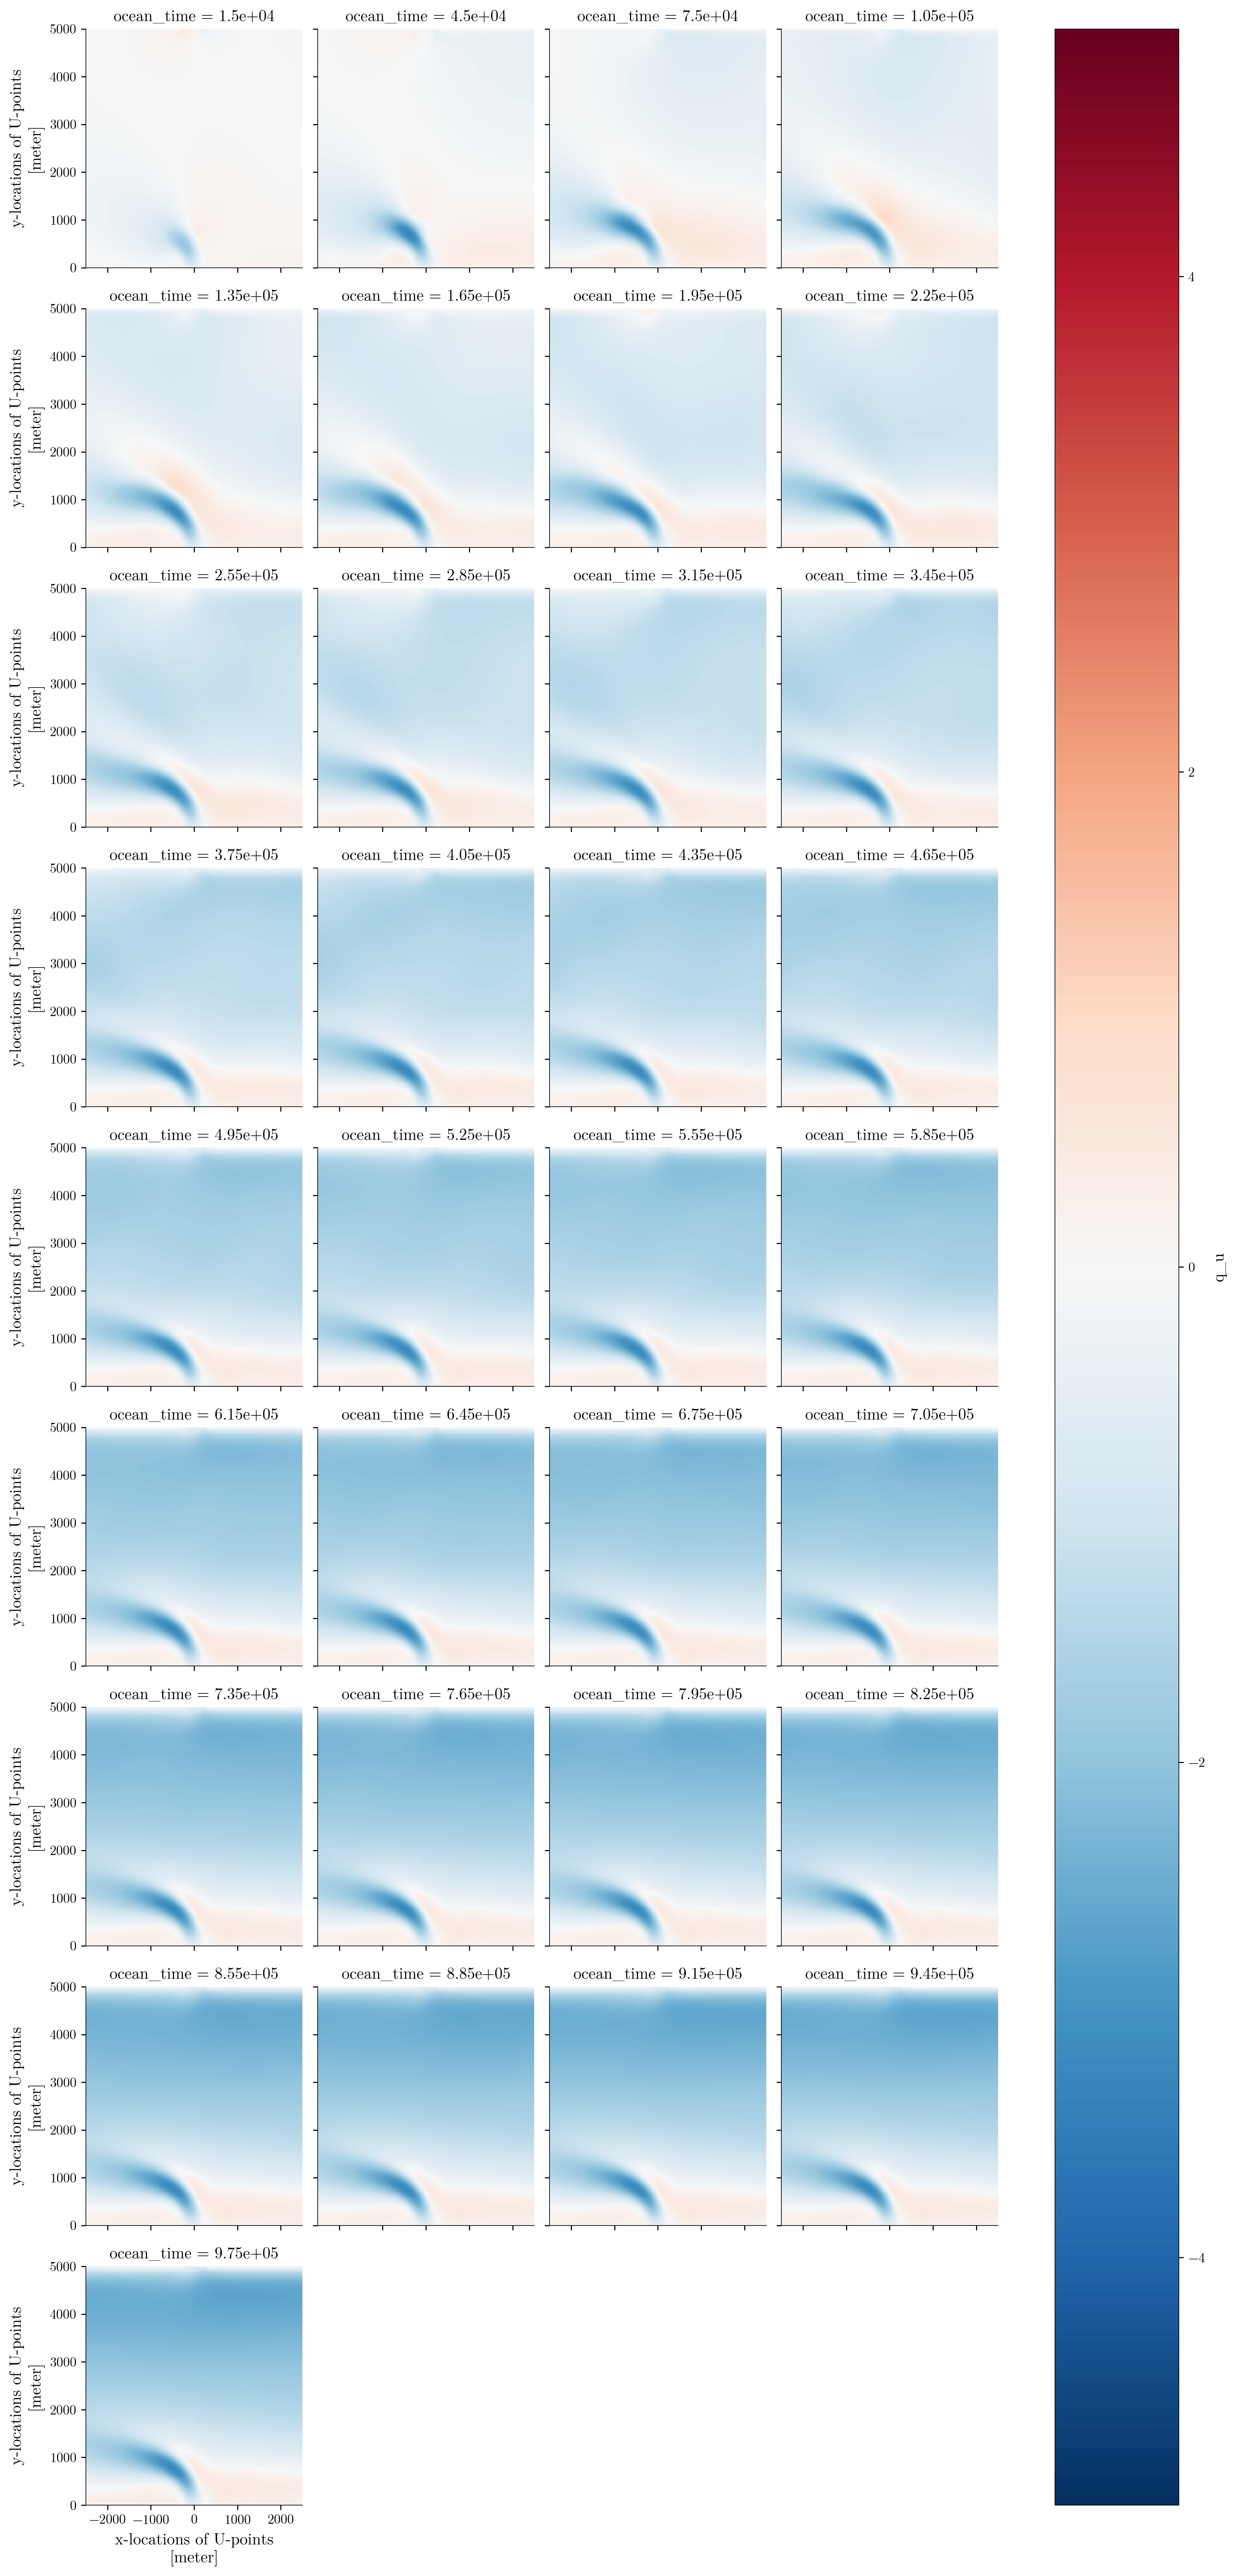

In [29]:
ds["q_s"] = ds.Usbar*ds.h_psi
ds["q_v"], ds["q_u"] = ds["vbar"]*ds["h_v"], ds["ubar"]*ds["h_u"]

ylim = (0, 5000)
xlim = (-2500, 2500)
aspect = abs(xlim[1]-xlim[0])/abs(ylim[1]-ylim[0])
norm = colors.TwoSlopeNorm(vcenter = 0)
kwa = {"col": "ocean_time", "col_wrap": 4, "cmap": "RdBu_r", "xlim": xlim, "ylim": ylim, "aspect": aspect}

#ds["mask_rho"].plot(x = "x_rho", y = "y_rho")
#ds["vbar"].isel(eta_v = 0, ocean_time = -1).plot(x = "x_v")

#ds["zeta"].plot(x ="x_rho", y = "y_rho", **kwa)
#ds["ubar"].plot(x ="x_u", y = "y_u",vmin = -.01, vmax = 0.01, **kwa)
#ds["vbar"].plot(x ="x_v", y = "y_v", vmin = -.2, vmax = 0.2, **kwa)
#ds["q_v"].plot(x ="x_v", y = "y_v", vmin = -5, vmax = 5, **kwa)
ds["q_u"].plot(x ="x_u", y = "y_u", vmin = -5, vmax = 5, **kwa)

#ds["K"].plot(x ="x_psi", y = "y_psi", vmin = -1e-3, vmax = 1e-3, **kwa)
#ds["rvorticity"].plot(x ="x_psi", y = "y_psi", norm = norm, **kwa)
#stretching.plot(x ="x_psi", y = "y_psi", norm = norm, **kwa)
#slope_torque.plot(x = "x_psi", y = "y_psi", norm = norm, **kwa)

#ds["q_s"].plot(x = "x_psi", y = "y_psi",vmin = -5, vmax = 5, **kwa)
#kwa.pop("cmap")
#ds["alphabar"].plot(x = "x_psi", y = "y_psi", vmin = -np.pi, vmax = np.pi, cmap = "twilight",  **kwa)


In [ ]:
#Vorticity (s,n)
slope = 0.1
ds["dhds"] = slope*np.sin(ds.alphabar)

ds["vorticity_advection"] = -ds.Usbar*( ds.rvorticity.differentiate("xi_u")*ds.pn_psi*np.cos(ds.alphabar) 
                                       + ds.rvorticity.differentiate("eta_v")*ds.pm_psi*np.sin(ds.alphabar) )
ds["vortex_stretching"] = (1/ds.h_psi)*(ds.rvorticity + ds.f_psi)*(ds.dndt_psi + ds.Usbar*ds.dhds)
ds["slope_torque"] = ds.Usbar**2*(ds.rdrg2/ds.h_psi**2)*slope*np.cos(ds.alphabar)
ds["speed_torque"] = ds.Usbar*(ds.rdrg2/ds.h_psi)*( - ds.Usbar.differentiate("xi_u")*ds.pn_psi*np.sin(ds.alphabar) 
                                                    + ds.Usbar.differentiate("eta_v")*ds.pm_psi*np.cos(ds.alphabar) )
ds["vorticity_dissipation"] = -ds.Usbar*(ds.rdrg2/ds.h_psi)*ds.rvorticity

ds["total"] = ds.vorticity_advection + ds.vortex_stretching + ds.slope_torque + ds.speed_torque + ds.vorticity_dissipation #+ ds.dωdt
#ds.alphabar.isel(ocean_time = - 1).plot(x = "x_psi", y = "y_psi", cmap = "twilight", vmin = -np.pi, vmax = np.pi)

#display(ds.vorticity_advection, ds.vortex_stretching, ds.slope_torque, ds.speed_torque, ds.vorticity_dissipation)
#assert set.intersection( set(vorticity_advection.dims), set(stretching.dims) ), "non-matching dims"

In [ ]:
#Vorticity 
ds["rvorticity"] = (grid.diff(ds.vbar/ds.pn_v, "xi") - grid.diff(ds.ubar/ds.pm_u, "eta"))*(ds.pm_psi*ds.pn_psi)
ds["dωdt"] = ds.rvorticity.chunk({"ocean_time": -1}).differentiate("ocean_time").chunk({"ocean_time": 1})
ds["dndt"] = ds.zeta.chunk({"ocean_time": -1}).differentiate("ocean_time").chunk({"ocean_time": 1})
ds["dndt_psi"] = grid.interp(ds.dndt, axis = ["xi", "eta"])

In [ ]:
#(x,y)
ds["dhdxi"] = grid.diff(ds.h,"xi")
ds["dhdeta"] = grid.diff(ds.h,"eta")
dωdxi = grid.interp(grid.interp( grid.diff(ds.h_u*ds.ubar*grid.interp(ds.rvorticity,"eta",boundary = "fill")/ds.pn_u, "xi"), "xi"),"eta")
dωdeta = grid.interp(grid.diff(ds.h_v*ds.vbar*grid.interp(ds.rvorticity,"xi")/ds.pm_v, "eta", boundary = "fill"), ["xi","eta"]) 
ds["vorticity_advection"] = -(dωdxi + dωdeta)*(ds.pm_psi*ds.pn_psi)

ds["stretching"] = (1/ds.h_psi)*(ds.rvorticity + ds.f_psi)*(  ds.dndt_psi
                                                       + ds.ubar_psi*grid.interp(ds.dhdxi,"eta") 
                                                       + ds.vbar_psi*grid.interp(ds.dhdeta,"xi"))

ds["slope_torque"] = -ds.Usbar*(ds.rdrg2/ds.h_psi**2)*( ds.vbar_psi*grid.interp(ds.dhdxi, "eta")*ds.pn_psi - ds.ubar_psi*grid.interp(ds.dhdeta, "xi")*ds.pm_psi )
ds["speed_torque"] = +(ds.rdrg2/ds.h_psi)*(ds.vbar_psi*ds.Usbar.differentiate("xi_u")*ds.pn_psi - ds.ubar_psi*ds.Usbar.differentiate("eta_v")*ds.pm_psi )
ds["vorticity_dissipation"] = -ds.Usbar*(ds.rdrg2/ds.h_psi)*ds.rvorticity
 
# ds["total"] = ds.vorticity_advection + ds.stretching + ds.slope_torque + ds.speed_torque + ds.vorticity_dissipation + ds.dωdt
#assert set.intersection( set(vorticity_advection.dims), set(stretching.dims) ), "non-matching dims"